In [126]:
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt

filepath = os.path.join("Historic_Request_ATL_20190122_14.json")
with open(filepath) as jsonfile:
    atl20180122_json = json.load(jsonfile)
    
    

In [127]:
#isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by departureGateDelayMinutes, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flight across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

data = atl20180122_json["request"]
flightstatuses = atl20180122_json["flightStatuses"]

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )

Flight_Counter = 0
Flights = []

for getFlight in atl20180122_json['flightStatuses']:
    Flight_Counter = Flight_Counter + 1
    print(f"Flight Counter: {Flight_Counter}")
    myFlightID = getFlight['flightId']
    #print(f"FlightID: {myFlightID}")
    myFlightCarrier = getFlight['carrierFsCode']
    myFlightNum = getFlight['flightNumber']
    print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
    myFlightDepAirport = getFlight['departureAirportFsCode']
    print(f"Airport: {myFlightDepAirport}")
    myFlightDepDateTime = getFlight['departureDate']['dateLocal']
    myFlightDepDate = myFlightDepDateTime.split("T")[0]
    print(f"Date: {myFlightDepDate}")
    myFlightStatus = getFlight['status']
    #print(f"Status: {myFlightStatus}")
    
    try:
        myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
        #myFlightScheduledDepTime = myFlightScheduledDep.split("T")[1]
        #myFlightShedDepHour = myFlightScheduledDepTime.split(":")[0]
        #myFlightShedDepMinutes = myFlightScheduledDepTime.split(":")[1]
        
        print(f"Scheduled Departure: {myFlightScheduledDep}")
        #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
        myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
        print(f"Actual Departure: {myFlightActualDep}")
        #myFlightActualDepTime = myFlightActualDep.split("T")[1]
        #myFlightActualDepHour = myFlightActualDepTime.split(":")[0]
        #myFlightActualDepMinutes = myFlightActualDepTime.split(":")[1]
        #print(f"Actual Dep Time: {myFlightActualDepTime} Hour: {myFlightActualDepHour} Minutes: {myFlightActualDepMinutes}")
    
        #myFlightDepStartTime = (int(myFlightShedDepHour) * 60) + int(myFlightShedDepMinutes)
        #myFlightDepEndTime = (int(myFlightActualDepHour) * 60) + int(myFlightActualDepMinutes)
                  
        
        #myFlightDelayMinutes = myFlightDepEndTime - myFlightDepStartTime
        #print(f"Start Time: {myFlightDepStartTime}")
        #print(f"End Time: {myFlightDepEndTime}")
        #print(f"Delay (Minutes): {myFlightDelayMinutes}")
        
        myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
        myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
        myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
        myFlightScheduled = myFlightScheduled.replace("-", " ")
        myScheduled = myFlightScheduled.replace(":", " ")
    
        myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
        myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
        start = myScheduled_dt
        
        myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
        myFlightActual = myFlightActualUTC.replace("T", " ")
        myFlightActual = myFlightActual.replace("-", " ")
        myActual = myFlightActual.replace(":", " ")
        myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
        myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
        end = myActual_dt
        
        if end > start:
            time_difference = (end - start)
            print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
            TimeDelta = int(time_difference.total_seconds()) / 60
        else:
            time_difference = (start - end)
            if start == end:
                TimeDelta = 0
                print("Flight Departed On Time!")
            else:
                print(f"Flight Departed Early by (H:M:S): {time_difference}")
                TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
        print(f"Departure Time Delta (minutes): {TimeDelta}")
        myFlightDelayMinutes = TimeDelta
        
    except:
        print(f"No Gate Depature Delay Data")
        myFlightDelayMinutes = 0
        print(f"Delay (Minutes): {myFlightDelayMinutes}")
        time_difference = 0
        print("Flight Departed On Time!")
        TimeDelta = 0
        print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
    print("\n")
    Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T12:59:00.000
Actual Departure: 2019-01-22T20:39:00.000
Flight Departure Delayed by (H:M:S): 7:40:00
Departure Time Delta (minutes): 460.0


Flight Counter: 2
Airline Flight#: DL9936
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 4:52:00
Departure Time Delta (minutes): 292.0


Flight Counter: 3
Airline Flight#: DL1311
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:22:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:48:00
Departure Time Delta (minutes): 48.0


Flight Counter: 4
Airline Flight#: DL1992
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:41:00.000
Actual Departure: 2019-01-22T14:46:00.000
Flight Departure Delayed by (H:M:S): 1:05:00
Departure Time Delta (minutes): 65.0


Flight Counter: 5
Airline 

Flight Counter: 109
Airline Flight#: DL788
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:54:00.000
Actual Departure: 2019-01-22T15:51:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 110
Airline Flight#: DL186
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:55:00.000
Actual Departure: 2019-01-22T15:57:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 111
Airline Flight#: DL1606
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:59:00.000
Actual Departure: 2019-01-22T16:06:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 112
Airline Flight#: DL1502
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:59:00.000
Actual Departure: 2019-01-22T15:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 113
Airline Fl

Departure Time Delta (minutes): -2.0


Flight Counter: 176
Airline Flight#: DL1433
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:36:00.000
Actual Departure: 2019-01-22T17:34:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 177
Airline Flight#: DL1522
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:38:00.000
Actual Departure: 2019-01-22T17:35:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 178
Airline Flight#: DL819
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:39:00.000
Actual Departure: 2019-01-22T17:48:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 179
Airline Flight#: DL925
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:45:00.000
Actual Departure: 2019-01-22T17:59:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes

Flight Counter: 259
Airline Flight#: DL1918
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:30:00.000
Actual Departure: 2019-01-22T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:09:00
Departure Time Delta (minutes): 9.0


Flight Counter: 260
Airline Flight#: DL2966
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:30:00.000
Actual Departure: 2019-01-22T19:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 261
Airline Flight#: DL1259
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:31:00.000
Actual Departure: 2019-01-22T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 262
Airline Flight#: DL2017
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:31:00.000
Actual Departure: 2019-01-22T19:26:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 263
Airline 

In [141]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()







Departure Summary for Date Range A

Total Departures Early: 169
Total Departures On Time: 20
Total Departures Delayed: 99
Total Departures: 288



,Early,On Time,Delayed
0,169,20,99


In [144]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,288.000000
mean,14.253472
std,67.939112
min,-14.000000
25%,-3.000000
50%,-1.000000
75%,5.000000
max,525.000000


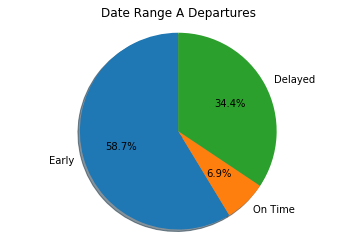

In [148]:
# Plot Date Range A Departures

Date_Range_A_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_A_Labels = ["Early", "On Time", "Delayed"]

plt.title("Date Range A Departures")
plt.pie(Date_Range_A_Summary, autopct="%1.1f%%", labels=Date_Range_A_Labels, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [ ]:
# Describe() for Date Range B
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B